In [41]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
m = np.array([[0.0, 1.0], [-0.01, -0.1]])

In [8]:
np.linalg.eig(m)

(array([-0.05+0.08660254j, -0.05-0.08660254j]),
 array([[ 0.99503719+0.j        ,  0.99503719-0.j        ],
        [-0.04975186+0.08617275j, -0.04975186-0.08617275j]]))

In [9]:
d,v = np.linalg.eig(m)

In [10]:
v[:,1]

array([ 0.99503719-0.j        , -0.04975186-0.08617275j])

In [11]:
np.dot(m, v[:,1])/v[:,1]

array([-0.05-0.08660254j, -0.05-0.08660254j])

In [16]:
import quaternions

In [17]:
dir(quaternions)

['Quaternion',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'quaternion']

In [19]:
q = quaternions.Quaternion(0.5,0.5,0.5,0.5)

In [20]:
q

In [27]:
e = q.get_euler()
e[2] += 0.2

In [28]:
q2 = quaternions.Quaternion.from_euler(e)
q2.w, q2.x, q2.y, q2.z

(0.4475853743155988,
 0.44758537431559875,
 -0.5474187909624268,
 0.547418790962427)

In [30]:
q3 = quaternions.Quaternion(q2.w, q2.x, q2.y, q2.z)
q3.w, q3.x, q3.y, q3.z

(0.4475853743155988,
 0.44758537431559875,
 -0.5474187909624268,
 0.547418790962427)

In [38]:
def scoop_from(filename):
    d_in = []
    d_out = []
    for line in open(filename):
        try:
            if line.find("::") > 0:
                q = line.split("::")[1].strip().split()
                q = [float(x) for x in q]
                e = quaternions.Quaternion(q[0], q[1], q[2], q[3]).get_euler()
                d_in.append(e)
            elif line.find(":controller answers:") > 0:
                q = line.split(":controller answers:")[1].strip().split()
                q = [float(x) for x in q]
                e = quaternions.Quaternion(q[0], q[1], q[2], q[3]).get_euler()
                d_out.append(e)
        except:
            print("Minor anomoly with line " + line)
    return (d_in, d_out)

In [39]:
results1 = scoop_from("by_euler.txt")

Minor anomoly with line  :: Done with steps



In [73]:
def analyze(filename, show_bounds=False):
    results = scoop_from(filename)
    plt.plot([i * 0.05 for i in range(len(results[0]))], [r[2] for r in results[0]], 'r-')
    plt.plot([i * 0.05 for i in range(len(results[1]))], [r[2] for r in results[1]], 'b-')
    print("Max time is " + str(0.05 * len(results[0])))
    if not show_bounds:
        return
    plt.plot([i * 0.05 for i in range(len(results[1]))], [np.pi/8 for r in results[1]], 'k-.')
    plt.plot([i * 0.05 for i in range(len(results[1]))], [-np.pi/8 for r in results[1]], 'k-.')

Minor anomoly with line  :: Done with steps

Max time is 120.0


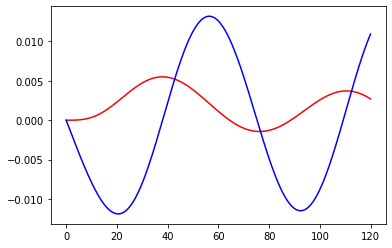

In [74]:
analyze("by_euler.txt")

Minor anomoly with line  :: Done with steps



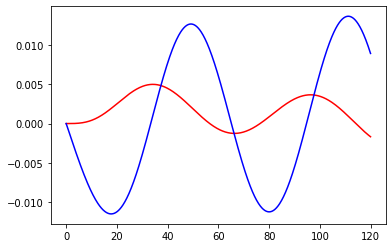

In [63]:
analyze("by_euler_wrong_omega.txt")

Minor anomoly with line  :: Done with steps



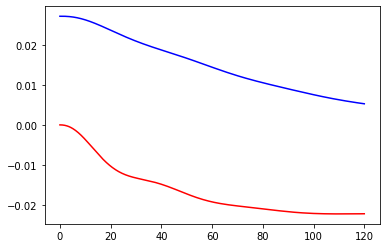

In [56]:
analyze("by_euler_simple.txt")

Minor anomoly with line  :: Done with steps



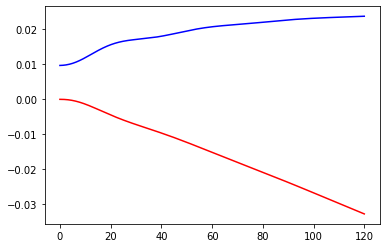

In [64]:
analyze("by_euler_really_simple_2.txt")

Minor anomoly with line  :: Done with steps



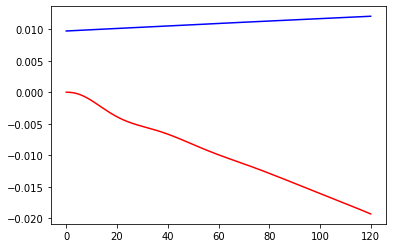

In [66]:
analyze("by_euler_really_simple_3.txt")

Minor anomoly with line  :: Done with steps



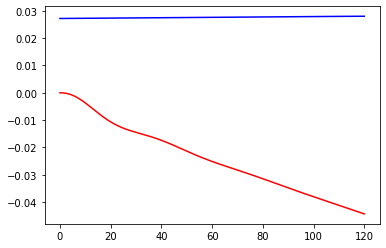

In [65]:
analyze("by_euler_really_simple.txt")

Minor anomoly with line  :: Uh oh, better provide some information!



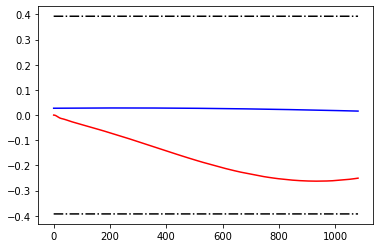

In [60]:
analyze("by_euler_really_simple_long.txt", show_bounds=True)

In [62]:
quaternions.Quaternion(0.9271931,   0.3739171,   0.0206473,  -0.0085174).get_euler()

[0.766651067420471, 0.044672528061480726, -0.00035414526318724906]

Minor anomoly with line  :: Uh oh, better provide some information!

Max time is 1080.75


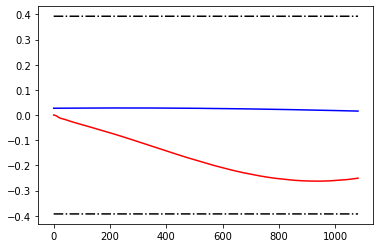

In [75]:
analyze("by_euler_really_simple_4.txt", show_bounds=True)

Minor anomoly with line  :: Uh oh, better provide some information!

Max time is 771.6


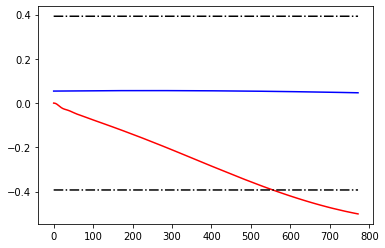

In [76]:
analyze("by_euler_really_simple_5.txt", show_bounds=True)

Minor anomoly with line  :: Uh oh, better provide some information!

Max time is 573.65


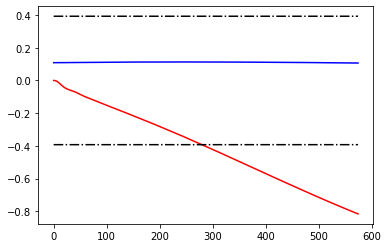

In [77]:
analyze("by_euler_really_simple_6.txt", show_bounds=True)